# summary table that address relevant factors related to COVID-19


In [67]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [74]:
df = pd.read_csv("/home/phani/Downloads/Data/551982_1387024_bundle_archive/metadata.csv")
df.head()

/home/phani/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,1.14726e+07,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,1.1668e+07,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,1.1668e+07,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,1.16869e+07,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,1.16869e+07,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [69]:
df.isnull().sum()

cord_uid                 0
sha                 119577
source_x                 0
title                   56
doi                  60017
pmcid               114165
pubmed_id            82062
license                  0
abstract             58970
publish_time            17
authors               6632
journal              11586
mag_id              204823
who_covidence_id    148092
arxiv_id            202123
pdf_json_files      119577
pmc_json_files      138831
url                  45856
s2_id                28631
dtype: int64

In [79]:
df[['title','abstract']].dropna(inplace=True)
df.shape

<ipython-input-79-7d3230f0d637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['title','abstract']].dropna(inplace=True)


(204823, 19)

In [16]:
# stop_words = set(stopwords.words('english')) 
# lemma = WordNetLemmatizer()
# def clean_data(text):
#     text = re.sub(r'http\S+', '', text)
#     text = re.sub('[^a-zA-Z]', ' ', text)         #Removing punctuations
#     text = str(text).lower()
#     text = word_tokenize(text)
#     text = [item for item in text if item not in stop_words]
#     text = [lemma.lemmatize(word=w, pos = 'v') for w in text]
#     text = ' '.join(text)
#     return text
# # df['abstract_new'] = df['abstract'].apply(clean_data)
# clean_data(df.abstract)

In [80]:
df.nunique()

cord_uid            203349
sha                  85242
source_x                43
title               176282
doi                 143372
pmcid                90658
pubmed_id           122697
license                 17
abstract            132613
publish_time          6993
authors             155610
journal              18737
mag_id                   0
who_covidence_id     56731
arxiv_id              2700
pdf_json_files       85242
pmc_json_files       65992
url                 158788
s2_id               130141
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'PMC'),
  Text(1, 0, 'Medline'),
  Text(2, 0, 'MedRxiv'),
  Text(3, 0, 'WHO'),
  Text(4, 0, 'BioRxiv'),
  Text(5, 0, 'Elsevier'),
  Text(6, 0, 'ArXiv'),
  Text(7, 0, 'Elsevier; PMC'),
  Text(8, 0, 'PMC; WHO'),
  Text(9, 0, 'Elsevier; Medline; PMC'),
  Text(10, 0, 'Medline; PMC'),
  Text(11, 0, 'Elsevier; PMC; WHO'),
  Text(12, 0, 'Medline; PMC; WHO'),
  Text(13, 0, 'MedRxiv; Medline; PMC'),
  Text(14, 0, 'Elsevier; Medline; PMC; WHO'),
  Text(15, 0, 'BioRxiv; MedRxiv'),
  Text(16, 0, 'ArXiv; Medline; PMC'),
  Text(17, 0, 'Medline; WHO'),
  Text(18, 0, 'BioRxiv; Medline; PMC; WHO'),
  Text(19, 0, 'ArXiv; Elsevier; Medline; PMC'),
  Text(20, 0, 'BioRxiv; MedRxiv; Medline; PMC'),
  Text(21, 0, 'BioRxiv; Medline'),
  Text(22, 0, 'BioRxiv; Medline; PMC'),
  Text(23, 0, 'Elsevier; WHO

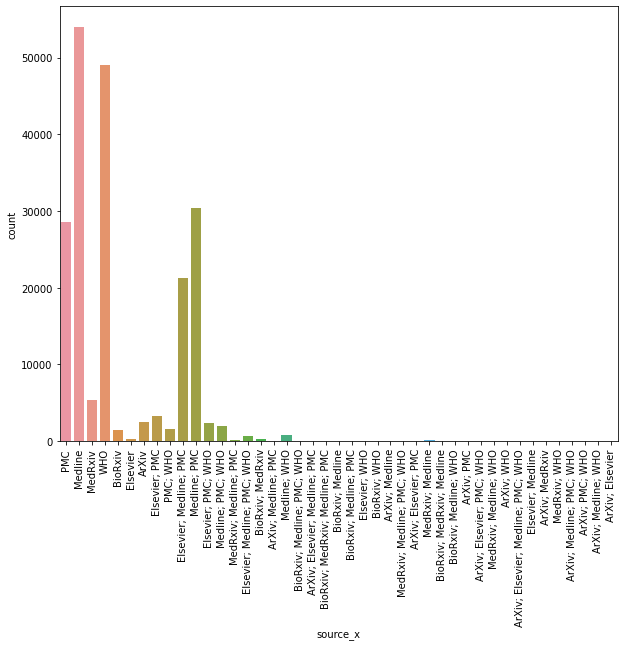

In [81]:
# Source Count Plot
plt.figure(figsize=(10, 8))
sns.countplot(df["source_x"])
plt.xticks(rotation=90)

From the graph, we can easily find that most of sources are combination of some basic sources.
We should decompose these combined sources to plot count more clearly.


In [82]:
# We can get decomposed sources by using split method.
temp_df = df["source_x"].str.split(";", expand=True)
temp_df.tail()

,0,1,2,3,4
204818,Medline,PMC,None,None,None
204819,Medline,PMC,None,None,None
204820,Elsevier,Medline,PMC,None,None
204821,Elsevier,Medline,PMC,WHO,None
204822,Elsevier,PMC,WHO,None,None


In [83]:
count_dict = {}

for row in range(len(temp_df)):
    for col in range(len(temp_df.columns)):
        key = temp_df.iloc[row, col]
        if key != None:
            key = key.lstrip()
        count_dict.setdefault(key, 0)
        count_dict[key] += 1

del count_dict[None]    # We delete key:None 
count_dict

{'PMC': 90658,
 'Medline': 109860,
 'MedRxiv': 6021,
 'WHO': 56731,
 'BioRxiv': 2086,
 'Elsevier': 27820,
 'ArXiv': 2700}

Text(0.5, 0, 'Source')

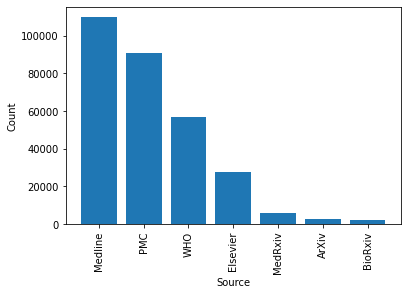

In [84]:
count_dict_sorted = dict(sorted(count_dict.items(), key=lambda x:x[1], reverse=True))

plt.bar(count_dict_sorted.keys(), count_dict_sorted.values())
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Source")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'no-cc'),
  Text(1, 0, 'green-oa'),
  Text(2, 0, 'bronze-oa'),
  Text(3, 0, 'cc-by'),
  Text(4, 0, 'cc-by-nc'),
  Text(5, 0, 'cc0'),
  Text(6, 0, 'cc-by-nc-nd'),
  Text(7, 0, 'gold-oa'),
  Text(8, 0, 'cc-by-nc-sa'),
  Text(9, 0, 'hybrid-oa'),
  Text(10, 0, 'cc-by-nd'),
  Text(11, 0, 'unk'),
  Text(12, 0, 'medrxiv'),
  Text(13, 0, 'biorxiv'),
  Text(14, 0, 'els-covid'),
  Text(15, 0, 'arxiv'),
  Text(16, 0, 'cc-by-sa')])

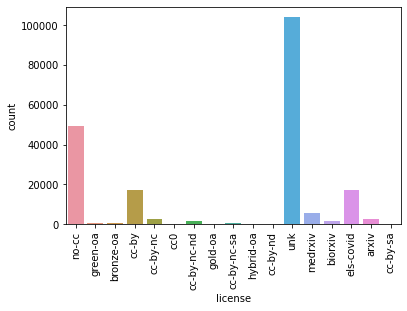

In [85]:
# License Count Plot
sns.countplot(df["license"])
plt.xticks(rotation=90)

In [86]:
df["year"] = df["publish_time"].str[:4].astype("float")
df["year"].unique()

array([2001., 2000., 2003., 2004., 2005., 1997., 2006., 2002., 2007.,
       2008., 2009., 2010., 2011., 2012., 1998., 1999., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 1972., 1973., 1969.,
       1975., 1990., 1996., 1981., 1980., 1988., 1982., 1983., 1991.,
       1994., 1976., 1987., 1984., 1995., 1974., 1970., 1989., 1992.,
       1979., 1978., 1971., 1985., 1993., 1977., 1986., 1951., 1967.,
       1956., 1955., 1968., 1964., 1952., 1931., 1922., 1925., 1950.,
       1962., 1957., 2021.,   nan, 1961., 1965., 1963., 1899., 1958.,
       1887., 1906., 1874., 1948., 1903., 1940., 1918., 1884., 1885.,
       1941., 1916., 1901., 1926., 1947., 1960., 1902., 1894., 1890.,
       1927., 1954., 1942., 1870., 1959., 1953., 1920.])

In [87]:
temp_series = df.groupby("year")["cord_uid"].count()

Text(0.5, 1.0, 'Total Record Count Transition')

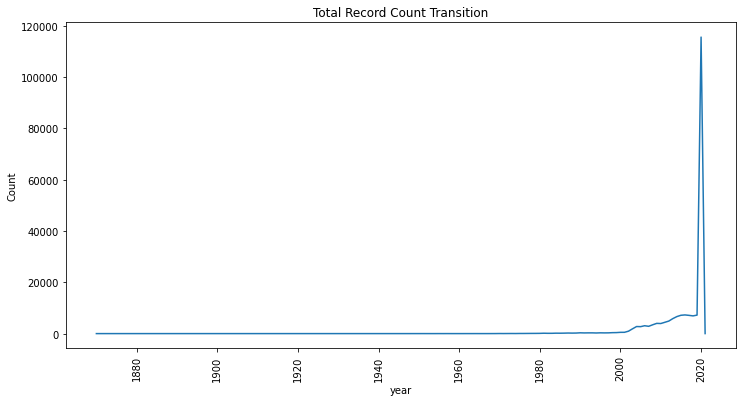

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_series.index, y=temp_series.values)
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Total Record Count Transition")

 We can easily find that record hits increase rapidly in 2020.

# Effectiveness of School Distancing Literature Summary
I extract the articles related to school distancing.

In [89]:
# We change title to lowercase.
df["title"] = df["title"].str.lower()
df["title"]

0         clinical features of culture-proven mycoplasma...
1         nitric oxide: a pro-inflammatory mediator in l...
2           surfactant protein-d and pulmonary host defense
3                      role of endothelin-1 in lung disease
4         gene expression in epithelial cells in respons...
                                ...                        
204818    global change of surgical and oncological clin...
204819    mobile health technology for enhancing the cov...
204820    health equity during covid-19: the case of ara...
204821    treatment of severe pneumonia due to covid-19 ...
204822    covid-19 waste management: effective and succe...
Name: title, Length: 204823, dtype: object

# we extract the records that contains 'school' and 'distancing' keywords in paper title. 

In [90]:
school_row = []

for row in range(len(df)):
    try:
        if ("school" in df.loc[row, "title"]) & ("clos" in df.loc[row, "title"]):
            school_row.append(row)
    except: 
        continue

print("We hit {} records when searching 'school' and 'closure'".format(len(school_row)))
print("This is {:.2f} % of this dataset".format(len(school_row) / len(df) * 100, 2))

We hit 88 records when searching 'school' and 'closure'
This is 0.04 % of this dataset


In [91]:
# Let's check the metadata in school_rows
school_dist = df.loc[school_row, :].head()
school_dist

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year
1469,3amxb7qr,0f6446c4b30e5df7450e1a2b7c141daed4d413f2,PMC,school closures during the 2009 influenza pand...,10.1186/1471-2334-14-207,PMC4021091,2.47398e+07,cc-by,BACKGROUND: School closure is a non-pharmaceut...,2014-04-16,"Cauchemez, Simon; Van Kerkhove, Maria D; Arche...",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/0f6446c4b30e5df7450e1...,document_parses/pmc_json/PMC4021091.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN,2014.0
3561,mkv1jc7u,84cdd2606c5e32c3573a6c70e5c9b14d22c5acc2,PMC,"the effect of school closure on hand, foot, an...",10.4269/ajtmh.18-0099,PMC6283473,3.03508e+07,cc-by,Singapore implements a school closure policy f...,2018-10-22,"Chen, Yirong; Badaruddin, Hishamuddin; Lee, Ve...",Am J Trop Med Hyg,NaN,NaN,NaN,document_parses/pdf_json/84cdd2606c5e32c3573a6...,document_parses/pmc_json/PMC6283473.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2018.0
10850,ewah8x7m,NaN,PMC,pandemic school closures: risks and opportunities,10.1016/s2352-4642(20)30105-x,PMC7195509,3.22779e+07,no-cc,NaN,2020-04-08,The Lancet Child & Adolescent Health,Lancet Child Adolesc Health,NaN,NaN,NaN,NaN,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0
12805,j0qlwmkn,3ebf58978acf7f2ad80813af0943926f20766c15,PMC,pandemic simulation of antivirals + school clo...,10.1007/s10588-008-9027-1,PMC7087848,NaN,no-cc,A strain-specific vaccine is unlikely to be av...,2008-04-11,"Mniszewski, S. M.; Del Valle, S. Y.; Stroud, P...",Comput Math Organ Theory,NaN,NaN,NaN,document_parses/pdf_json/3ebf58978acf7f2ad8081...,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2008.0
28368,bqpchl7q,NaN,Medline,covid-19: school closures and bans on mass gat...,10.1136/bmj.m806,NaN,3.21117e+07,unk,NaN,2020-02-28,"Moberly, Tom",BMJ,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1136/bmj.m806; https://www....,211564902.0,2020.0


In [92]:
# Submission DataaFrame, first we make its format and fill out the content later
# summary_df = pd.DataFrame(columns = ['Date', 'Study', 'Study Link', 'Journal', 'Study Type', 'Factors', 'Influential', 'Excerpt',
#                                     'Measure of Evidence', 'Added on', 'pdf_json_file', 'pmc_json_file', 'abstract'])
summary_df = pd.DataFrame(columns = ['Date', 'Study', 'Study Link', 'Journal','pdf_json_file', 'pmc_json_file',
                                     'abstract'])

# General Info
summary_df["Date"] = df.loc[school_row, "publish_time"]
summary_df["Study"] = df.loc[school_row, "title"]
summary_df["Study Link"] = df.loc[school_row, "url"]
summary_df["Journal"] = df.loc[school_row, "journal"]
summary_df["pdf_json_file"] = df.loc[school_row, "pdf_json_files"]
summary_df["pmc_json_file"] = df.loc[school_row, "pmc_json_files"]
summary_df["abstract"] = df.loc[school_row, "abstract"]
summary_df.head()

,Date,Study,Study Link,Journal,pdf_json_file,pmc_json_file,abstract
1469,2014-04-16,school closures during the 2009 influenza pand...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,BMC Infect Dis,document_parses/pdf_json/0f6446c4b30e5df7450e1...,document_parses/pmc_json/PMC4021091.xml.json,BACKGROUND: School closure is a non-pharmaceut...
3561,2018-10-22,"the effect of school closure on hand, foot, an...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,Am J Trop Med Hyg,document_parses/pdf_json/84cdd2606c5e32c3573a6...,document_parses/pmc_json/PMC6283473.xml.json,Singapore implements a school closure policy f...
10850,2020-04-08,pandemic school closures: risks and opportunities,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Lancet Child Adolesc Health,NaN,NaN,NaN
12805,2008-04-11,pandemic simulation of antivirals + school clo...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Comput Math Organ Theory,document_parses/pdf_json/3ebf58978acf7f2ad8081...,NaN,A strain-specific vaccine is unlikely to be av...
28368,2020-02-28,covid-19: school closures and bans on mass gat...,https://doi.org/10.1136/bmj.m806; https://www....,BMJ,NaN,NaN,NaN


In [93]:
summary_df.count()

Date             88
Study            88
Study Link       55
Journal          83
pdf_json_file    32
pmc_json_file    23
abstract         47
dtype: int64

In [156]:
x1 = summary_df['Study'].count()
x1

88

In [95]:
summary_df['Study Link'].dropna(inplace = True)
list(summary_df["Study Link"])

['https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4021091/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6283473/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7195509/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7087848/',
 'https://doi.org/10.1136/bmj.m806; https://www.ncbi.nlm.nih.gov/pubmed/32111656/',
 'https://doi.org/10.17061/phrp3022007; https://www.ncbi.nlm.nih.gov/pubmed/32601650/',
 'https://doi.org/10.7326/0003-4819-156-3-201202070-00005; https://www.ncbi.nlm.nih.gov/pubmed/22312137/',
 'https://doi.org/10.1136/bmj.m1060; https://www.ncbi.nlm.nih.gov/pubmed/32169967/',
 'https://doi.org/10.1136/bmj.39520.678009.db; https://www.ncbi.nlm.nih.gov/pubmed/18356218/',
 'https://doi.org/10.1542/peds.2020-1440; https://www.ncbi.nlm.nih.gov/pubmed/32554517/',
 'https://doi.org/10.1136/bmj.m2439; https://www.ncbi.nlm.nih.gov/pubmed/32554416/',
 'https://doi.org/10.1097/phh.0b013e3181ce594e; https://www.ncbi.nlm.nih.gov/pubmed/20035236/',
 'https://doi.org/10.1002/oby.22813; h

# Effectiveness of case isolation/isolation of exposed individuals (i.e. quarantine)


In [160]:
isolation_row = []

for row in range(len(df)):
    try:
        if ("isolation" in df.loc[row, "title"]) & ("quarantine" in df.loc[row, "title"]):
            isolation_row.append(row)
    except: 
        continue

print("We hit {} records when searching 'isolation' and 'quarantine'".format(len(isolation_row)))
print("This is {:.2f} % of this dataset".format(len(isolation_row) / len(df) * 100, 2))

We hit 54 records when searching 'isolation' and 'quarantine'
This is 0.03 % of this dataset


In [161]:
# Let's check the metadata in isolation_row
isolation = df.loc[isolation_row, :].head()
isolation

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year
24617,ri9aqyck,NaN,PMC,erratum to “the effectiveness of quarantine an...,10.1016/j.ijid.2020.05.112,PMC7292803,NaN,no-cc,NaN,2020-06-13,NaN,Int J Infect Dis,NaN,NaN,NaN,NaN,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2020.0
29967,ta8sss1s,NaN,Medline,establishing and managing a quarantine and iso...,10.5455/jpma.06,NaN,3.25154e+07,unk,The novel coronavirus disease (COVID-19) is a ...,2020-05-01,"Mansoor, Sahibzada Nasir; Gill, Zaheer Ahmad; ...",JPMA. The Journal of the Pakistan Medical Asso...,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.5455/jpma.06; https://www.n...,218947811.0,2020.0
35132,miem1poh,NaN,Medline,the impact of the covid-19 pandemic on domesti...,10.1177/0025817220930553,NaN,32501175,unk,Domestic violence is a global public health pr...,2020-06-05,"Sacco, Matteo Antonio; Caputo, Fiorella; Ricci...",The Medico-legal journal,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1177/0025817220930553; http...,219330234.0,2020.0
35438,u5nibp17,NaN,Medline,"the role of asymptomatic class, quarantine and...",10.1080/17513758.2020.1773000,NaN,32498655,unk,We formulate a deterministic epidemic model fo...,2020-12-01,"Ali, Mohsin; Shah, Syed Touqeer H; Imran, Muda...",Journal of biological dynamics,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1080/17513758.2020.1773000;...,219331448.0,2020.0
43695,5ehxfimu,NaN,Medline,feasibility of separate rooms for home isolati...,10.7326/m20-4331,NaN,32692931,unk,NaN,2020-07-21,"Sehgal, Ashwini R; Himmelstein, David U; Woolh...",Annals of internal medicine,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.7326/m20-4331; https://www....,220700764.0,2020.0


In [162]:
summary_df1 = pd.DataFrame(columns = ['Date', 'Study', 'Study Link', 'Journal','pdf_json_file', 'pmc_json_file',
                                     'abstract'])

# General Info
summary_df1["Date"] = df.loc[isolation_row, "publish_time"]
summary_df1["Study"] = df.loc[isolation_row, "title"]
summary_df1["Study Link"] = df.loc[isolation_row, "url"]
summary_df1["Journal"] = df.loc[isolation_row, "journal"]
summary_df1["pdf_json_file"] = df.loc[isolation_row, "pdf_json_files"]
summary_df1["pmc_json_file"] = df.loc[isolation_row, "pmc_json_files"]
summary_df1["abstract"] = df.loc[isolation_row, "abstract"]
summary_df1.head()

,Date,Study,Study Link,Journal,pdf_json_file,pmc_json_file,abstract
24617,2020-06-13,erratum to “the effectiveness of quarantine an...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Int J Infect Dis,NaN,NaN,NaN
29967,2020-05-01,establishing and managing a quarantine and iso...,https://doi.org/10.5455/jpma.06; https://www.n...,JPMA. The Journal of the Pakistan Medical Asso...,NaN,NaN,The novel coronavirus disease (COVID-19) is a ...
35132,2020-06-05,the impact of the covid-19 pandemic on domesti...,https://doi.org/10.1177/0025817220930553; http...,The Medico-legal journal,NaN,NaN,Domestic violence is a global public health pr...
35438,2020-12-01,"the role of asymptomatic class, quarantine and...",https://doi.org/10.1080/17513758.2020.1773000;...,Journal of biological dynamics,NaN,NaN,We formulate a deterministic epidemic model fo...
43695,2020-07-21,feasibility of separate rooms for home isolati...,https://doi.org/10.7326/m20-4331; https://www....,Annals of internal medicine,NaN,NaN,NaN


In [163]:
x2 = summary_df1['Study'].count()
x2

54

# Effectiveness of a multifactorial strategy prevent secondary transmission

In [126]:
secondary_trans = []

for row in range(len(df)):
    try:
        if ("secondary" in df.loc[row, "title"]) & ("trans" in df.loc[row, "title"]):
            secondary_trans.append(row)
    except: 
        continue

print("We hit {} records when searching 'travel' and 'workplace'".format(len(secondary_trans)))
print("This is {:.2f} % of this dataset".format(len(secondary_trans) / len(df) * 100, 2))

We hit 34 records when searching 'travel' and 'workplace'
This is 0.02 % of this dataset


In [127]:
# Let's check the metadata in isolation_row
secondary = df.loc[secondary_trans, :].head()
secondary

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year
1147,l600aeuo,490c64195eec44f9280570aece9732e7a120bd34; 3770...,PMC,dynamics of translation by single ribosomes th...,10.1038/nsmb.2544,PMC3648610,2.35422e+07,no-cc,"During protein synthesis, the ribosome transla...",2013-03-31,"Chen, Chunlai; Zhang, Haibo; Broitman, Steven ...",Nat Struct Mol Biol,NaN,NaN,NaN,document_parses/pdf_json/490c64195eec44f928057...,document_parses/pmc_json/PMC3648610.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2013.0
2962,7xp143nc,0676519ecc7cd61639721c0d062615707f044506,PMC,lack of secondary transmission of ebola virus ...,10.3201/eid2312.171100,PMC5708221,2.91484e+07,no-cc,"In December 2014, Ebola virus disease (EVD) wa...",2017-12-31,"Crook, Paul; Smith-Palmer, Alison; Maguire, He...",Emerg Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/0676519ecc7cd61639721...,document_parses/pmc_json/PMC5708221.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2017.0
16447,6lc1fcpe,f49ae69ee991e2a8d37703ff1566ab2a4f6eba14,PMC,secondary metabolite production in transgenic ...,10.1007/978-3-319-28669-3_6,PMC7123301,NaN,no-cc,Cucurbits are important group of vegetables du...,2017-01-18,"Rekha, Kaliyaperumal; Thiruvengadam, Muthu",Transgenesis and Secondary Metabolism,NaN,NaN,NaN,document_parses/pdf_json/f49ae69ee991e2a8d3770...,document_parses/pmc_json/PMC7123301.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2017.0
28805,mzgkbql0,NaN,Medline,hemodialysis with cohort isolation to prevent ...,10.1681/asn.2020040461,NaN,3.24827e+07,unk,BACKGROUND Health care-associated infections d...,2020-06-01,"Cho, Jang-Hee; Kang, Seok Hui; Park, Hayne Cho...",Journal of the American Society of Nephrology ...,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1681/asn.2020040461; https:...,219169296.0,2020.0
34718,olsn3wst,NaN,Medline,early secondary prevention in transient ischem...,10.1007/s11910-019-0950-y,NaN,31089960,unk,PURPOSE OF REVIEW The purpose of this study wa...,2019,"Tse, Dominic; Hill, Michael D; Coutts, Shelagh B",Current neurology and neuroscience reports,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1007/s11910-019-0950-y; htt...,155092413.0,2019.0


In [129]:
secondary['title'].count()

5

In [130]:
summary_df2 = pd.DataFrame(columns = ['Date', 'Study', 'Study Link', 'Journal','pdf_json_file', 'pmc_json_file',
                                     'abstract'])

# General Info
summary_df2["Date"] = df.loc[secondary_trans, "publish_time"]
summary_df2["Study"] = df.loc[secondary_trans, "title"]
summary_df2["Study Link"] = df.loc[secondary_trans, "url"]
summary_df2["Journal"] = df.loc[secondary_trans, "journal"]
summary_df2["pdf_json_file"] = df.loc[secondary_trans, "pdf_json_files"]
summary_df2["pmc_json_file"] = df.loc[secondary_trans, "pmc_json_files"]
summary_df2["abstract"] = df.loc[secondary_trans, "abstract"]
summary_df2.head()

,Date,Study,Study Link,Journal,pdf_json_file,pmc_json_file,abstract
1147,2013-03-31,dynamics of translation by single ribosomes th...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Nat Struct Mol Biol,document_parses/pdf_json/490c64195eec44f928057...,document_parses/pmc_json/PMC3648610.xml.json,"During protein synthesis, the ribosome transla..."
2962,2017-12-31,lack of secondary transmission of ebola virus ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Emerg Infect Dis,document_parses/pdf_json/0676519ecc7cd61639721...,document_parses/pmc_json/PMC5708221.xml.json,"In December 2014, Ebola virus disease (EVD) wa..."
16447,2017-01-18,secondary metabolite production in transgenic ...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Transgenesis and Secondary Metabolism,document_parses/pdf_json/f49ae69ee991e2a8d3770...,document_parses/pmc_json/PMC7123301.xml.json,Cucurbits are important group of vegetables du...
28805,2020-06-01,hemodialysis with cohort isolation to prevent ...,https://doi.org/10.1681/asn.2020040461; https:...,Journal of the American Society of Nephrology ...,NaN,NaN,BACKGROUND Health care-associated infections d...
34718,2019,early secondary prevention in transient ischem...,https://doi.org/10.1007/s11910-019-0950-y; htt...,Current neurology and neuroscience reports,NaN,NaN,PURPOSE OF REVIEW The purpose of this study wa...


In [165]:
x3 = summary_df2['Study'].count()
x3

34

In [132]:
summary_df2['Study Link'].dropna(inplace = True)
list(summary_df2["Study Link"])

['https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648610/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5708221/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7123301/',
 'https://doi.org/10.1681/asn.2020040461; https://www.ncbi.nlm.nih.gov/pubmed/32482688/',
 'https://doi.org/10.1007/s11910-019-0950-y; https://www.ncbi.nlm.nih.gov/pubmed/31089960/',
 'https://doi.org/10.1055/s-0038-1673663; https://www.ncbi.nlm.nih.gov/pubmed/30474067/',
 'https://doi.org/10.1007/s10029-010-0728-2; https://www.ncbi.nlm.nih.gov/pubmed/20835907/',
 'https://doi.org/10.4097/kjae.2012.63.3.284; https://www.ncbi.nlm.nih.gov/pubmed/23060992/',
 'https://doi.org/10.3201/eid2608.201142; https://www.ncbi.nlm.nih.gov/pubmed/32453686/',
 'https://doi.org/10.1016/j.jvscit.2018.03.010; https://www.ncbi.nlm.nih.gov/pubmed/30148237/',
 'http://medrxiv.org/cgi/content/short/2020.05.21.20108746v1?rss=1',
 'https://doi.org/10.1101/2020.03.06.20032177',
 'https://doi.org/10.1101/2020.02.28.20029272',
 'http://medrxi

# How does temperature and humidity affect the transmission of 2019-nCoV

In [140]:
temp_hum = []

for row in range(len(df)):
    try:
        if ("temperature" in df.loc[row, "title"]) & ("humidity" in df.loc[row, "title"]):
            temp_hum.append(row)
    except: 
        continue

print("We hit {} records when searching 'temperature' and 'humidity'".format(len(temp_hum)))
print("This is {:.2f} % of this dataset".format(len(temp_hum) / len(df) * 100, 2))

We hit 60 records when searching 'temperature' and 'humidity'
This is 0.03 % of this dataset


In [141]:
# Let's check the metadata in isolation_row
temparature_humidity = df.loc[temp_hum, :].head()
temparature_humidity

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year
1256,byant7dh,31390ea0f2fc73d3cd3fee80ca0de765ddd68429,PMC,seasonality of viral respiratory infections in...,10.1590/s1517-838220120001000011,PMC3768995,2.40318e+07,cc-by-nc,Viruses are the major cause of lower respirato...,2012-06-01,"Gardinassi, Luiz Gustavo; Marques Simas, Paulo...",Braz J Microbiol,NaN,NaN,NaN,document_parses/pdf_json/31390ea0f2fc73d3cd3fe...,document_parses/pmc_json/PMC3768995.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2012.0
3259,qm8kalyt,ba2d3601f5ae3bb5964c8515431abe352bad9437,PMC,"the association between temperature, rainfall ...",10.1371/journal.pone.0199579,PMC6013221,2.99281e+07,cc-by,Bangladesh is one of the world’s most vulnerab...,2018-06-21,"Chowdhury, Fazle Rabbi; Ibrahim, Quazi Shihab ...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/ba2d3601f5ae3bb5964c8...,document_parses/pmc_json/PMC6013221.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2018.0
34256,hplnl4ch,NaN,Medline,modelling the inactivation of viruses from the...,10.1128/aem.01244-20,NaN,32680860,unk,Temperature and relative humidity are major fa...,2020-07-17,"Guillier, Laurent; Martin-Latil, Sandra; Chaix...",Applied and environmental microbiology,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1128/aem.01244-20; https://...,220629492.0,2020.0
36002,24a4y27a,NaN,Medline,effect of temperature and humidity on the dyna...,10.26355/eurrev_202007_21927,NaN,32706095,unk,OBJECTIVE Weather-related dynamics have an imp...,2020-07-01,"Meo, S A; Abukhalaf, A A; Alomar, A A; Alsalam...",European review for medical and pharmacologica...,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.26355/eurrev_202007_21927; ...,220730706.0,2020.0
37145,oak8ubqv,NaN,Medline,indoor temperature and relative humidity in ho...,10.1136/oemed-2020-106653,NaN,32424023,unk,NaN,2020-05-18,"Quraishi, Sadeq A; Berra, Lorenzo; Nozari, Ala",Occupational and environmental medicine,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1136/oemed-2020-106653; htt...,218691524.0,2020.0


In [142]:
summary_df3 = pd.DataFrame(columns = ['Date', 'Study', 'Study Link', 'Journal','pdf_json_file', 'pmc_json_file',
                                     'abstract'])

# General Info
summary_df3["Date"] = df.loc[temp_hum, "publish_time"]
summary_df3["Study"] = df.loc[temp_hum, "title"]
summary_df3["Study Link"] = df.loc[temp_hum, "url"]
summary_df3["Journal"] = df.loc[temp_hum, "journal"]
summary_df3["pdf_json_file"] = df.loc[temp_hum, "pdf_json_files"]
summary_df3["pmc_json_file"] = df.loc[temp_hum, "pmc_json_files"]
summary_df3["abstract"] = df.loc[temp_hum, "abstract"]
summary_df3.head()

,Date,Study,Study Link,Journal,pdf_json_file,pmc_json_file,abstract
1256,2012-06-01,seasonality of viral respiratory infections in...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,Braz J Microbiol,document_parses/pdf_json/31390ea0f2fc73d3cd3fe...,document_parses/pmc_json/PMC3768995.xml.json,Viruses are the major cause of lower respirato...
3259,2018-06-21,"the association between temperature, rainfall ...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,PLoS One,document_parses/pdf_json/ba2d3601f5ae3bb5964c8...,document_parses/pmc_json/PMC6013221.xml.json,Bangladesh is one of the world’s most vulnerab...
34256,2020-07-17,modelling the inactivation of viruses from the...,https://doi.org/10.1128/aem.01244-20; https://...,Applied and environmental microbiology,NaN,NaN,Temperature and relative humidity are major fa...
36002,2020-07-01,effect of temperature and humidity on the dyna...,https://doi.org/10.26355/eurrev_202007_21927; ...,European review for medical and pharmacologica...,NaN,NaN,OBJECTIVE Weather-related dynamics have an imp...
37145,2020-05-18,indoor temperature and relative humidity in ho...,https://doi.org/10.1136/oemed-2020-106653; htt...,Occupational and environmental medicine,NaN,NaN,NaN


In [166]:
x4 = summary_df3['Study'].count()
x4

60

In [143]:
summary_df3['Study Link'].dropna(inplace = True)
list(summary_df3["Study Link"])

['https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3768995/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6013221/',
 'https://doi.org/10.1128/aem.01244-20; https://www.ncbi.nlm.nih.gov/pubmed/32680860/',
 'https://doi.org/10.26355/eurrev_202007_21927; https://www.ncbi.nlm.nih.gov/pubmed/32706095/',
 'https://doi.org/10.1136/oemed-2020-106653; https://www.ncbi.nlm.nih.gov/pubmed/32424023/',
 'https://doi.org/10.1159/000114252; https://www.ncbi.nlm.nih.gov/pubmed/18230912/',
 'https://doi.org/10.1128/aem.02291-09; https://www.ncbi.nlm.nih.gov/pubmed/20228108/',
 'https://doi.org/10.1001/jama.2015.153; https://www.ncbi.nlm.nih.gov/pubmed/25688786/',
 'http://medrxiv.org/cgi/content/short/2020.05.23.20111278v1?rss=1',
 'http://medrxiv.org/cgi/content/short/2020.04.18.20070920v1?rss=1',
 'http://medrxiv.org/cgi/content/short/2020.03.22.20038919v1?rss=1',
 'https://doi.org/10.1101/2020.03.19.20039164',
 'http://medrxiv.org/cgi/content/short/2020.06.29.20142307v1?rss=1',
 'http://medrxiv.org/

In [144]:
summary_df3.count()

Date             60
Study            60
Study Link       43
Journal          43
pdf_json_file    27
pmc_json_file    18
abstract         56
dtype: int64

# Effectiveness of personal protective equipment (PPE)

In [148]:
PPE = []

for row in range(len(df)):
    try:
        if ("protective" in df.loc[row, "title"]) & ("equipment" in df.loc[row, "title"]):
            PPE.append(row)
    except: 
        continue

print("We hit {} records when searching 'temperature' and 'humidity'".format(len(PPE)))
print("This is {:.2f} % of this dataset".format(len(PPE) / len(df) * 100, 2))

We hit 570 records when searching 'temperature' and 'humidity'
This is 0.28 % of this dataset


In [149]:
# Let's check the metadata in isolation_row
personal_protect_equip = df.loc[PPE, :].head()
personal_protect_equip

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year
2435,er9kqdjw,80dc6a5a5b823d6e1fb9802becae1575ddb8dd89,PMC,contamination during doffing of personal prote...,10.15441/ceem.15.019,PMC5052842,2.77526e+07,cc-by-nc,"OBJECTIVE: In this study, we aimed to describe...",2015-09-30,"Lim, Seong Mi; Cha, Won Chul; Chae, Minjung Ka...",Clin Exp Emerg Med,NaN,NaN,NaN,document_parses/pdf_json/80dc6a5a5b823d6e1fb98...,document_parses/pmc_json/PMC5052842.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2015.0
3079,dhdyxnr3,731076fd240ebb00a9faf96ca9cedd40fb5fa50c,PMC,incorporating health workers’ perspectives int...,10.12688/f1000research.12922.2,PMC5820616,2.95273e+07,cc-by,Background: Ebola virus disease (EVD) health f...,2018-03-09,"Den Boon, Saskia; Vallenas, Constanza; Ferri, ...",F1000Res,NaN,NaN,NaN,document_parses/pdf_json/731076fd240ebb00a9faf...,document_parses/pmc_json/PMC5820616.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2018.0
4099,5bjkn2j2,4b22861aa553b97e42e6a1b95b744e0ec2dcd6b2,PMC,healthcare workers’ strategies for doffing per...,10.1093/cid/ciz613,PMC6743502,3.1518e+07,cc-by,BACKGROUND: Personal protective equipment (PPE...,2019-10-01,"Baloh, Jure; Reisinger, Heather Schacht; Dukes...",Clin Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/4b22861aa553b97e42e6a...,document_parses/pmc_json/PMC6743502.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,2019.0
7803,xzm36og6,NaN,PMC,are you covered? safe practices for the use of...,10.1016/j.jen.2014.11.011,PMC7119349,2.56125e+07,no-cc,NaN,2015-01-19,"Valdez, Anna Maria",J Emerg Nurs,NaN,NaN,NaN,NaN,document_parses/pmc_json/PMC7119349.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2015.0
8553,vvsy8qsz,NaN,PMC,"uncertainty, risk analysis and change for ebol...",10.1016/j.ijnurstu.2014.12.001,PMC7130314,2.55758e+07,no-cc,NaN,2014-12-18,"MacIntyre, C. Raina; Chughtai, Abrar Ahmad; Se...",Int J Nurs Stud,NaN,NaN,NaN,NaN,document_parses/pmc_json/PMC7130314.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,2014.0


In [151]:
summary_df4 = pd.DataFrame(columns = ['Date', 'Study', 'Study Link', 'Journal','pdf_json_file', 'pmc_json_file',
                                     'abstract'])

# General Info
summary_df4["Date"] = df.loc[PPE, "publish_time"]
summary_df4["Study"] = df.loc[PPE, "title"]
summary_df4["Study Link"] = df.loc[PPE, "url"]
summary_df4["Journal"] = df.loc[PPE, "journal"]
summary_df4["pdf_json_file"] = df.loc[PPE, "pdf_json_files"]
summary_df4["pmc_json_file"] = df.loc[PPE, "pmc_json_files"]
summary_df4["abstract"] = df.loc[PPE, "abstract"]
summary_df4.head()

,Date,Study,Study Link,Journal,pdf_json_file,pmc_json_file,abstract
2435,2015-09-30,contamination during doffing of personal prote...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Clin Exp Emerg Med,document_parses/pdf_json/80dc6a5a5b823d6e1fb98...,document_parses/pmc_json/PMC5052842.xml.json,"OBJECTIVE: In this study, we aimed to describe..."
3079,2018-03-09,incorporating health workers’ perspectives int...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,F1000Res,document_parses/pdf_json/731076fd240ebb00a9faf...,document_parses/pmc_json/PMC5820616.xml.json,Background: Ebola virus disease (EVD) health f...
4099,2019-10-01,healthcare workers’ strategies for doffing per...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,Clin Infect Dis,document_parses/pdf_json/4b22861aa553b97e42e6a...,document_parses/pmc_json/PMC6743502.xml.json,BACKGROUND: Personal protective equipment (PPE...
7803,2015-01-19,are you covered? safe practices for the use of...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,J Emerg Nurs,NaN,document_parses/pmc_json/PMC7119349.xml.json,NaN
8553,2014-12-18,"uncertainty, risk analysis and change for ebol...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Int J Nurs Stud,NaN,document_parses/pmc_json/PMC7130314.xml.json,NaN


In [168]:
x5 = summary_df4['Study'].count()
x5

570

In [152]:
summary_df4['Study Link'].dropna(inplace = True)
list(summary_df4["Study Link"])

['https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5052842/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5820616/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6743502/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7119349/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7130314/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7155761/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7267359/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7273941/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5630798/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7121518/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7121970/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7152191/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7152422/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7270044/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7295284/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7297078/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7324337/',
 'https://www.

# Visulizing the no of articles which are published on following topics

In [176]:
temp_df = pd.DataFrame({'count':[x1,x2,x3,x4,x5],
      'articles':['Effectiveness of School Distancing', 'Effectiveness of case isolation/isolation', 'strategy prevent secondary transmission',
       'temperature and humidity affect the transmission', 'Effectiveness of personal protective equipment']})
temp_df.head()



,count,articles
0,88,Effectiveness of School Distancing
1,54,Effectiveness of case isolation/isolation
2,34,strategy prevent secondary transmission
3,60,temperature and humidity affect the transmission
4,570,Effectiveness of personal protective equipment


Text(0.5, 0, 'count')

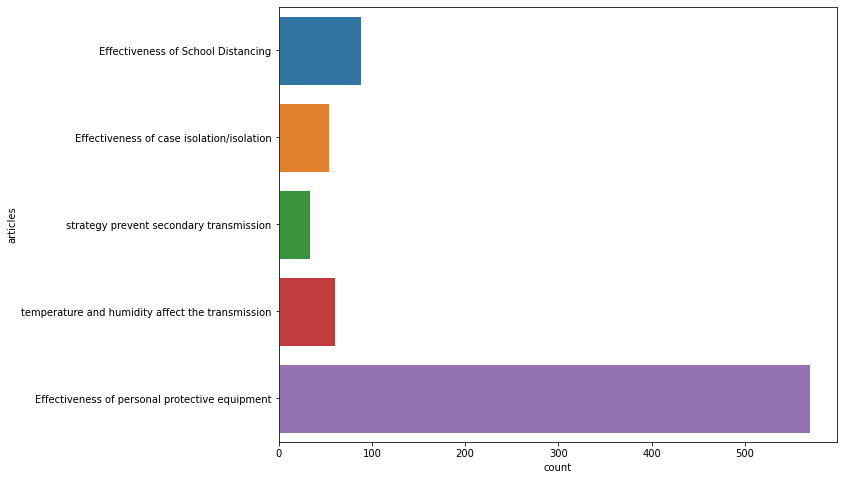

In [191]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x = 'count', y = 'articles', data = temp_df, edgecolor = 'w')
ax.set_xlabel('count')